In [ ]:
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [ ]:
BR_US_futures = ['BRL=X', '^BVSP', 'NQ=F']

In [ ]:
futures_df = pd.DataFrame()
for ind in BR_US_futures:
  futures_df[ind] = yf.download(ind, start= '2015-01-01', rounding= True, keepna= False)['Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
futures_df.rename(columns= {'BRL=X' : 'USD/BRL', '^BVSP' : 'IBOV', 'NQ=F' : 'NASDAQ'}, inplace= True)
futures_df

,USD/BRL,IBOV,NASDAQ
Date,,,
2015-01-01,2.6542,NaN,NaN
2015-01-02,2.6532,48512.0,4214.25
2015-01-05,2.6912,47517.0,4161.75
2015-01-06,2.7031,48001.0,4102.25
2015-01-07,2.6966,49463.0,4151.50
...,...,...,...
2023-09-05,4.9362,117331.0,15534.50
2023-09-06,4.9667,115985.0,15399.50
2023-09-07,4.9770,NaN,15282.25


In [ ]:
futures_df.isnull().sum()

USD/BRL      0
IBOV       115
NASDAQ      84
dtype: int64

In [ ]:
futures_df.dropna(inplace= True)
futures_df

,USD/BRL,IBOV,NASDAQ
Date,,,
2015-01-02,2.6532,48512.0,4214.25
2015-01-05,2.6912,47517.0,4161.75
2015-01-06,2.7031,48001.0,4102.25
2015-01-07,2.6966,49463.0,4151.50
2015-01-08,2.6808,49943.0,4232.25
...,...,...,...
2023-08-31,4.8884,115742.0,15538.50
2023-09-01,4.9538,117893.0,15516.25
2023-09-05,4.9362,117331.0,15534.50


In [ ]:
var_futures_df = (futures_df / futures_df.shift(1)) - 1
var_futures_df

,USD/BRL,IBOV,NASDAQ
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,0.014322,-0.020510,-0.012458
2015-01-06,0.004422,0.010186,-0.014297
2015-01-07,-0.002405,0.030458,0.012006
2015-01-08,-0.005859,0.009704,0.019451
...,...,...,...
2023-08-31,0.007647,-0.015255,0.002403
2023-09-01,0.013379,0.018584,-0.001432
2023-09-05,-0.003553,-0.004767,0.001176


In [ ]:
var_futures_df.corr() * 100

,USD/BRL,IBOV,NASDAQ
USD/BRL,100.000000,0.170001,1.866494
IBOV,0.170001,100.000000,48.001778
NASDAQ,1.866494,48.001778,100.000000


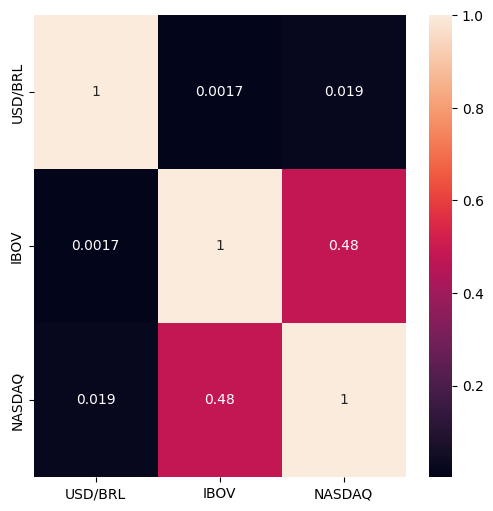

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(var_futures_df.corr(), annot= True);